In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
a = pd.read_csv("../../datasets/built_dataset.csv")

In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475428 entries, 0 to 475427
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    475428 non-null  object 
 1   Category Name                475428 non-null  object 
 2   Date                         475428 non-null  object 
 3   Time                         475428 non-null  object 
 4   Item Code                    475428 non-null  int64  
 5   Quantity Sold (kilo)         475428 non-null  float64
 6   Unit Selling Price (RMB/kg)  475428 non-null  float64
 7   Sale or Return               475428 non-null  object 
 8   Discount (Yes/No)            475428 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 32.6+ MB


In [4]:
a.head()

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,green hot peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,sale,No
1,green hot peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,sale,No
2,yunnan lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0,sale,No
3,xixia mushroom,mushroom,2021-01-01,09:18:49.451,102900005116530,0.389,18.0,sale,No
4,paopaojiao,capsicum,2021-01-01,09:19:14.842,102900005117056,0.606,18.0,sale,No


In [5]:
c = pd.read_csv("../../datasets/annex/annex3.csv")
c.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [6]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
# Check for duplicates in the 'Item Code' column
duplicates_counts = c['Item Code'].duplicated().sum()

# Print the count of duplicates
print("Number of duplicate entries in 'Item Code':", duplicates_counts)

# Optionally, you can print the actual duplicated rows
duplicates = c[c['Item Code'].duplicated(keep=False)]
print("Duplicate entries:")
print(duplicates)


Number of duplicate entries in 'Item Code': 55731
Duplicate entries:
             Date        Item Code  Wholesale Price (RMB/kg)
0      2020-07-01  102900005115762                      3.88
1      2020-07-01  102900005115779                      6.72
2      2020-07-01  102900005115786                      3.19
3      2020-07-01  102900005115793                      9.24
4      2020-07-01  102900005115823                      7.03
...           ...              ...                       ...
55977  2023-06-30  102900051000944                     18.00
55978  2023-06-30  102900051004294                      6.45
55979  2023-06-30  102900051010455                      4.48
55980  2023-06-30  106949711300259                      1.45
55981  2023-06-30  106971533450003                      1.95

[55974 rows x 3 columns]


In [8]:
d = pd.read_csv('../../datasets/annex/annex4.csv')
(d.head())

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [10]:
# Check for duplicates in the 'Item Code' column
duplicates_count = d['Item Code'].duplicated().sum()

# Print the count of duplicates
print("Number of duplicate entries in 'Item Code':", duplicates_count)

# Optionally, you can print the actual duplicated rows
duplicates = d[d['Item Code'].duplicated(keep=False)]
print("Duplicate entries:")
print(duplicates)

Number of duplicate entries in 'Item Code': 0
Duplicate entries:
Empty DataFrame
Columns: [Item Code, Item Name, Loss Rate (%)]
Index: []


In [11]:
c = c.drop_duplicates()
c

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03
...,...,...,...
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45


In [12]:
d = d.drop_duplicates()
d

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78
...,...,...,...
246,106971533455008,Haixian Mushroom (Bag) (3),1.30
247,106971563780002,Xianzongye (Bag) (2),0.00
248,106972776821582,Xianzongye (Bag) (3),9.43
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),11.13


<BarContainer object of 6 artists>

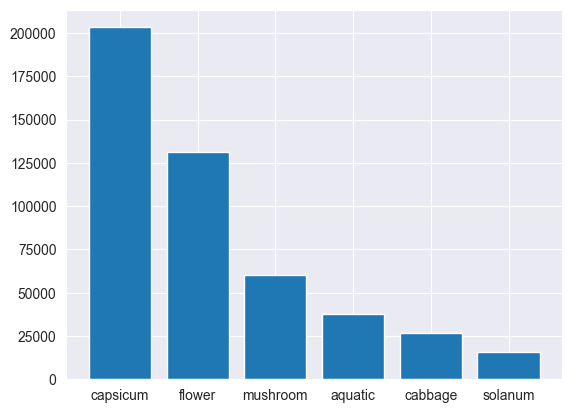

In [13]:
plt.bar(a['Category Name'].unique(), a['Category Name'].value_counts())

In [14]:
a['Item Name'].value_counts()

Item Name
wuhu green pepper       58250
xixia mushroom          31617
yunnan shengcai         28387
net lotus root          27617
eggplant                17333
                        ...  
huanghuacai                 1
broccoli                    1
white jelly mushroom        1
ice grass                   1
fruit pepper                1
Name: count, Length: 177, dtype: int64

In [15]:
d['Item Name'].value_counts()

Item Name
Apricot Bao Mushroom (Bag)                  2
Broccoli                                    2
Chinese Caterpillar Fungus Flowers (Bag)    2
Chinese Cabbage                             2
Green Hang Pepper (Bag)                     1
                                           ..
Chicken Fir Bacteria                        1
Wild Lotus Root (1)                         1
Black Porcini                               1
Haixian Mushroom (Bag) (1)                  1
Hfyg Haixian Mushroom (Bunch)               1
Name: count, Length: 247, dtype: int64

In [16]:
c.columns = c.columns.str.replace(" ", "_")
c.head()

,Date,Item_Code,Wholesale_Price_(RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [17]:
d.columns = d.columns.str.replace(" ", "_")
d.head()

,Item_Code,Item_Name,Loss_Rate_(%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [18]:
a.dtypes

Item Name                       object
Category Name                   object
Date                            object
Time                            object
Item Code                        int64
Quantity Sold (kilo)           float64
Unit Selling Price (RMB/kg)    float64
Sale or Return                  object
Discount (Yes/No)               object
dtype: object

In [19]:
c.columns = [col.replace('_', ' ') for col in c.columns]

In [20]:
# Convert 'Date' column to object type
c['Date'] = c['Date'].astype(str)

In [21]:
c.dtypes

Date                         object
Item Code                     int64
Wholesale Price (RMB/kg)    float64
dtype: object

In [22]:
d.columns = [col.replace('_', ' ') for col in d.columns]

In [23]:
d.dtypes

Item Code          int64
Item Name         object
Loss Rate (%)    float64
dtype: object

In [24]:
print(c['Date'].min(), c['Date'].max())

2020-07-01 2023-06-30


In [25]:
cf = c[(c['Date'] >= '2021-01-01') & (c['Date'] <= '2022-12-31')]
cf.shape

(39491, 3)

In [26]:
sales_wholesale_df = pd.merge(a, cf, on=['Item Code', 'Date'], how='inner')
sales_wholesale_df.head()

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg)
0,green hot peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,sale,No,15.21
1,green hot peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,sale,No,15.21
2,green hot peppers,capsicum,2021-01-01,16:38:10.054,102900005116226,0.205,25.8,sale,No,15.21
3,green hot peppers,capsicum,2021-01-01,17:31:18.233,102900005116226,0.302,25.8,sale,No,15.21
4,green hot peppers,capsicum,2021-01-01,19:57:07.847,102900005116226,0.341,25.8,sale,No,15.21


In [27]:
sales_wholesale_df.isnull().sum()

Item Name                      0
Category Name                  0
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Wholesale Price (RMB/kg)       0
dtype: int64

In [28]:
for i in range(sales_wholesale_df.shape[0]):
    for j in range(d.shape[0]):
        if sales_wholesale_df['Item Code'].iloc[i] == d['Item Code'].iloc[j]:
            sales_wholesale_df.at[i, 'Item Name'] = d['Item Name'].iloc[j]
            sales_wholesale_df.at[i, 'Loss Rate (%)'] = d['Loss Rate (%)'].iloc[j]
            break  # Break the inner loop once a match is found

# Display the merged DataFrame 'a'
sales_wholesale_cat_df = sales_wholesale_df
sales_wholesale_cat_df.head()

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Loss Rate (%)
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,sale,No,15.21,6.72
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,sale,No,15.21,6.72
2,Green Hot Peppers,capsicum,2021-01-01,16:38:10.054,102900005116226,0.205,25.8,sale,No,15.21,6.72
3,Green Hot Peppers,capsicum,2021-01-01,17:31:18.233,102900005116226,0.302,25.8,sale,No,15.21,6.72
4,Green Hot Peppers,capsicum,2021-01-01,19:57:07.847,102900005116226,0.341,25.8,sale,No,15.21,6.72


In [29]:
sales_wholesale_cat_df.isnull().sum()

Item Name                      0
Category Name                  0
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
dtype: int64

In [30]:
data = sales_wholesale_cat_df
data.head()

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Loss Rate (%)
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,sale,No,15.21,6.72
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,sale,No,15.21,6.72
2,Green Hot Peppers,capsicum,2021-01-01,16:38:10.054,102900005116226,0.205,25.8,sale,No,15.21,6.72
3,Green Hot Peppers,capsicum,2021-01-01,17:31:18.233,102900005116226,0.302,25.8,sale,No,15.21,6.72
4,Green Hot Peppers,capsicum,2021-01-01,19:57:07.847,102900005116226,0.341,25.8,sale,No,15.21,6.72


In [31]:
data.isnull().sum()

Item Name                      0
Category Name                  0
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
dtype: int64

In [32]:
data = data.drop_duplicates()
data

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Loss Rate (%)
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,sale,No,15.21,6.72
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,sale,No,15.21,6.72
2,Green Hot Peppers,capsicum,2021-01-01,16:38:10.054,102900005116226,0.205,25.8,sale,No,15.21,6.72
3,Green Hot Peppers,capsicum,2021-01-01,17:31:18.233,102900005116226,0.302,25.8,sale,No,15.21,6.72
4,Green Hot Peppers,capsicum,2021-01-01,19:57:07.847,102900005116226,0.341,25.8,sale,No,15.21,6.72
...,...,...,...,...,...,...,...,...,...,...,...
475423,Red Hot Peppers (Bag),capsicum,2022-12-31,14:33:18.391,102900011032244,1.000,6.9,sale,No,1.38,9.43
475424,Red Hot Peppers (Bag),capsicum,2022-12-31,15:45:43.643,102900011032244,1.000,6.9,sale,No,1.38,9.43
475425,Red Hot Peppers (Bag),capsicum,2022-12-31,16:27:45.236,102900011032244,1.000,6.9,sale,No,1.38,9.43
475426,Tremella (Flower),mushroom,2022-12-31,19:58:52.093,102900011007044,1.000,3.9,sale,No,2.61,9.14


In [33]:
data['Discount (Yes/No)'].value_counts()

Discount (Yes/No)
No     449384
Yes     26044
Name: count, dtype: int64

In [34]:
data['Discount (Yes/No)'] = data['Discount (Yes/No)'].map({'No' : False, "Yes":True})
data['Discount (Yes/No)'].value_counts()

Discount (Yes/No)
False    449384
True      26044
Name: count, dtype: int64

In [35]:
#All Sales
data['Quantity Sold (kilo)'] = data['Quantity Sold (kilo)'].round(1)
data = data.assign(total_sales = data['Quantity Sold (kilo)'] * data['Unit Selling Price (RMB/kg)'])
data.head()

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Loss Rate (%),total_sales
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.1,25.8,sale,False,15.21,6.72,28.38
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.6,25.8,sale,False,15.21,6.72,15.48
2,Green Hot Peppers,capsicum,2021-01-01,16:38:10.054,102900005116226,0.2,25.8,sale,False,15.21,6.72,5.16
3,Green Hot Peppers,capsicum,2021-01-01,17:31:18.233,102900005116226,0.3,25.8,sale,False,15.21,6.72,7.74
4,Green Hot Peppers,capsicum,2021-01-01,19:57:07.847,102900005116226,0.3,25.8,sale,False,15.21,6.72,7.74


In [36]:
## total sales per day
total_sales_per_day = data.groupby(['Date'])['total_sales'].sum().reset_index()
total_sales_per_day

,Date,total_sales
0,2021-01-01,4216.20
1,2021-01-02,3857.16
2,2021-01-03,3649.94
3,2021-01-04,2977.62
4,2021-01-05,3063.84
...,...,...
716,2022-12-27,2007.50
717,2022-12-28,1945.18
718,2022-12-29,2075.87
719,2022-12-30,1923.96


In [37]:
data['Item Name'].nunique()

177

In [38]:
avg_selling_price_each_item = data.groupby(['Item Name'])['Unit Selling Price (RMB/kg)'].mean().reset_index().rename(columns = {"Unit Selling Price (RMB/kg)" : "Avg Selling Price"})
avg_selling_price_each_item

,Item Name,Avg Selling Price
0,7 Colour Pepper (1),21.805952
1,Agaricus Bisporus (Bag),7.980000
2,Aihao,6.000000
3,Amaranth,4.814853
4,Amaranth (Bag),2.748941
...,...,...
172,Zhijiang Red Bolt,5.286030
173,Zhijiang Red Bolt (Bag),2.177636
174,Zhimaxiancai,6.000000
175,Zhuyecai,5.041174


In [39]:
## average selling price for each item and each category

avg_selling_price_each_category = data.groupby(['Category Name'])['Unit Selling Price (RMB/kg)'].mean().reset_index().rename(columns = {"Unit Selling Price (RMB/kg)" : "Avg Selling Price"})
avg_selling_price_each_category

,Category Name,Avg Selling Price
0,aquatic,9.313394
1,cabbage,7.440543
2,capsicum,10.600124
3,flower,6.393244
4,mushroom,15.684773
5,solanum,8.871278


In [40]:
top_selling_item = avg_selling_price_each_item.nlargest(1, 'Avg Selling Price')
top_selling_item

,Item Name,Avg Selling Price
10,Black Porcini,91.6


In [41]:
# Drop unnecessary columns (if any)
columns_to_drop = ['Item Code']
data = data.drop(columns=columns_to_drop)
data.head()

,Item Name,Category Name,Date,Time,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Loss Rate (%),total_sales
0,Green Hot Peppers,capsicum,2021-01-01,09:14:26.212,1.1,25.8,sale,False,15.21,6.72,28.38
1,Green Hot Peppers,capsicum,2021-01-01,09:14:26.324,0.6,25.8,sale,False,15.21,6.72,15.48
2,Green Hot Peppers,capsicum,2021-01-01,16:38:10.054,0.2,25.8,sale,False,15.21,6.72,5.16
3,Green Hot Peppers,capsicum,2021-01-01,17:31:18.233,0.3,25.8,sale,False,15.21,6.72,7.74
4,Green Hot Peppers,capsicum,2021-01-01,19:57:07.847,0.3,25.8,sale,False,15.21,6.72,7.74


In [42]:
data.isnull().sum()

Item Name                      0
Category Name                  0
Date                           0
Time                           0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
total_sales                    0
dtype: int64

In [43]:
import pandas as pd

# Assuming 'filtered_data' is your preprocessed dataset
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Aggregate data based on month and year
monthly_data = data.groupby(['Year', 'Month']).agg({
    'Quantity Sold (kilo)': 'sum',
    'Loss Rate (%)': 'mean',
    'total_sales': 'sum'
}).reset_index()

desired_column_order = [
    'Date', 
    'Year', 
    'Month',
    'Time', 
    'Category Name', 
    'Item Name', 
    'Quantity Sold (kilo)', 
    'Unit Selling Price (RMB/kg)', 
    'Wholesale Price (RMB/kg)', 
    'Loss Rate (%)', 
    'total_sales', 
    'Sale or Return', 
    'Discount (Yes/No)'
    # Add any other columns you want at the end
]
# Reorder the columns of merged_data based on the desired_column_order
data = data.reindex(columns=desired_column_order)

# Display the DataFrame with the reordered columns
data.head()

,Date,Year,Month,Time,Category Name,Item Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Wholesale Price (RMB/kg),Loss Rate (%),total_sales,Sale or Return,Discount (Yes/No)
0,2021-01-01,2021,1,09:14:26.212,capsicum,Green Hot Peppers,1.1,25.8,15.21,6.72,28.38,sale,False
1,2021-01-01,2021,1,09:14:26.324,capsicum,Green Hot Peppers,0.6,25.8,15.21,6.72,15.48,sale,False
2,2021-01-01,2021,1,16:38:10.054,capsicum,Green Hot Peppers,0.2,25.8,15.21,6.72,5.16,sale,False
3,2021-01-01,2021,1,17:31:18.233,capsicum,Green Hot Peppers,0.3,25.8,15.21,6.72,7.74,sale,False
4,2021-01-01,2021,1,19:57:07.847,capsicum,Green Hot Peppers,0.3,25.8,15.21,6.72,7.74,sale,False


In [44]:
# Drop unnecessary columns (if any)
columns_to_drops = ['Year', 'Date', 'Time']
data = data.drop(columns=columns_to_drops)
data.head()

,Month,Category Name,Item Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Wholesale Price (RMB/kg),Loss Rate (%),total_sales,Sale or Return,Discount (Yes/No)
0,1,capsicum,Green Hot Peppers,1.1,25.8,15.21,6.72,28.38,sale,False
1,1,capsicum,Green Hot Peppers,0.6,25.8,15.21,6.72,15.48,sale,False
2,1,capsicum,Green Hot Peppers,0.2,25.8,15.21,6.72,5.16,sale,False
3,1,capsicum,Green Hot Peppers,0.3,25.8,15.21,6.72,7.74,sale,False
4,1,capsicum,Green Hot Peppers,0.3,25.8,15.21,6.72,7.74,sale,False


In [45]:
data.isnull().sum()

Month                          0
Category Name                  0
Item Name                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
total_sales                    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

Check Outliers and Outlier Handling

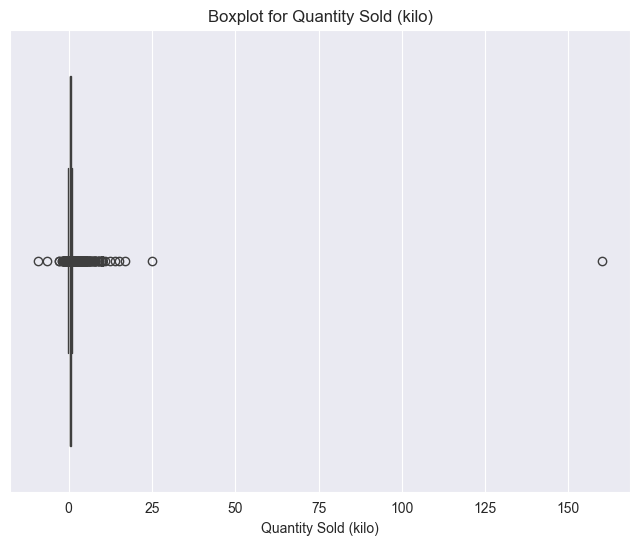

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a boxplot specifically for the 'Quantity Sold (kilo)' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=data['Quantity Sold (kilo)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Quantity Sold (kilo)')  # Set the title of the plot
plt.xlabel('Quantity Sold (kilo)')  # Set the label for the x-axis
plt.show()  # Display the plot


In [47]:
import numpy as np
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Quantity Sold (kilo)'
Q1 = data['Quantity Sold (kilo)'].quantile(0.25)
Q3 = data['Quantity Sold (kilo)'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = (data['Quantity Sold (kilo)'] < lower_bound) | (data['Quantity Sold (kilo)'] > upper_bound)

# Calculate the mean excluding outliers
mean_without_outliers = np.mean(data.loc[~outliers, 'Quantity Sold (kilo)'])

# Replace outliers with the mean excluding outliers
data.loc[outliers, 'Quantity Sold (kilo)'] = mean_without_outliers

# Filter out rows where 'Quantity Sold (kilo)' is outside the bounds
filtered_data = data[(data['Quantity Sold (kilo)'] >= lower_bound) & (data['Quantity Sold (kilo)'] <= upper_bound)]

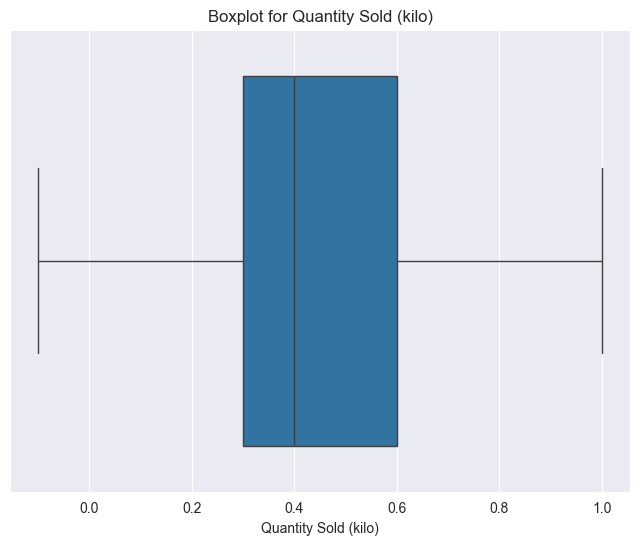

In [48]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['Quantity Sold (kilo)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Quantity Sold (kilo)')  # Set the title of the plot
plt.xlabel('Quantity Sold (kilo)')  # Set the label for the x-axis
plt.show()

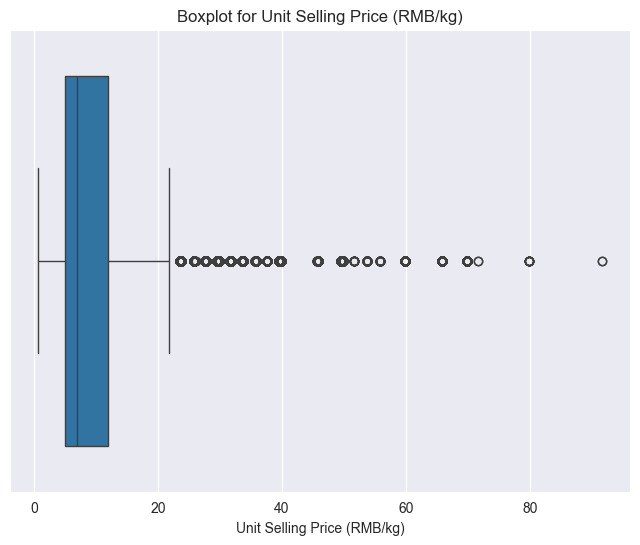

In [49]:
# Generate a boxplot specifically for the 'Unit Selling Price (RMB/kg)' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['Unit Selling Price (RMB/kg)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Unit Selling Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('Unit Selling Price (RMB/kg)')  # Set the label for the x-axis
plt.show()  # Display the plot

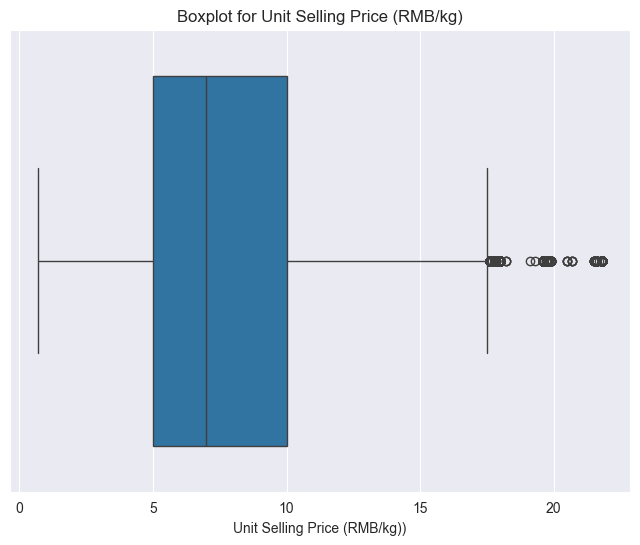

In [50]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Unit Selling Price (RMB/kg)'
Q1 = filtered_data['Unit Selling Price (RMB/kg)'].quantile(0.25)
Q3 = filtered_data['Unit Selling Price (RMB/kg)'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = (data['Unit Selling Price (RMB/kg)'] < lower_bound) | (data['Unit Selling Price (RMB/kg)'] > upper_bound)

# Replace outliers with the mean value without considering outliers in the mean calculation
mean_without_outliers = np.mean(data.loc[~outliers, 'Unit Selling Price (RMB/kg)'])
data.loc[outliers, 'Unit Selling Price (RMB/kg)'] = mean_without_outliers

# Filter out rows where 'Unit Selling Price (RMB/kg)' is outside the bounds
filtered_data = data[(data['Unit Selling Price (RMB/kg)'] >= lower_bound) & (data['Unit Selling Price (RMB/kg)'] <= upper_bound)]

plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['Unit Selling Price (RMB/kg)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Unit Selling Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('Unit Selling Price (RMB/kg))')  # Set the label for the x-axis
plt.show()


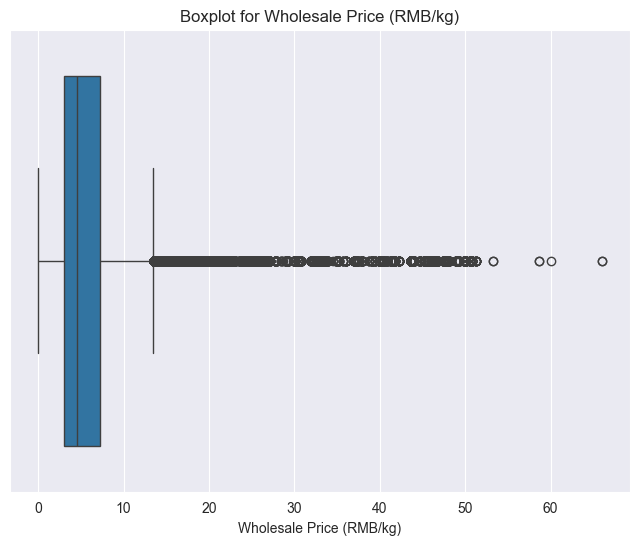

In [51]:
# Generate a boxplot specifically for the 'Wholesale Price (RMB/kg)' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['Wholesale Price (RMB/kg)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Wholesale Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('Wholesale Price (RMB/kg)')  # Set the label for the x-axis
plt.show()  # Display the plot

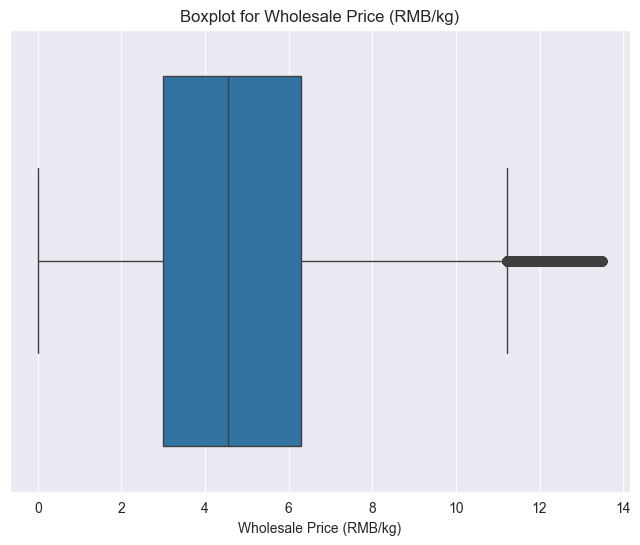

In [52]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Wholesale Price (RMB/kg)'
Q1 = filtered_data['Wholesale Price (RMB/kg)'].quantile(0.25)
Q3 = filtered_data['Wholesale Price (RMB/kg)'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = (data['Wholesale Price (RMB/kg)'] < lower_bound) | (data['Wholesale Price (RMB/kg)'] > upper_bound)

# Replace outliers with the mean value without considering outliers in the mean calculation
mean_without_outliers = np.mean(data.loc[~outliers, 'Wholesale Price (RMB/kg)'])
data.loc[outliers, 'Wholesale Price (RMB/kg)'] = mean_without_outliers

# Filter out rows where 'Wholesale Price (RMB/kg)' is outside the bounds
filtered_data = data[(data['Wholesale Price (RMB/kg)'] >= lower_bound) & (data['Wholesale Price (RMB/kg)'] <= upper_bound)]

plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['Wholesale Price (RMB/kg)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Wholesale Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('Wholesale Price (RMB/kg)')  # Set the label for the x-axis
plt.show()

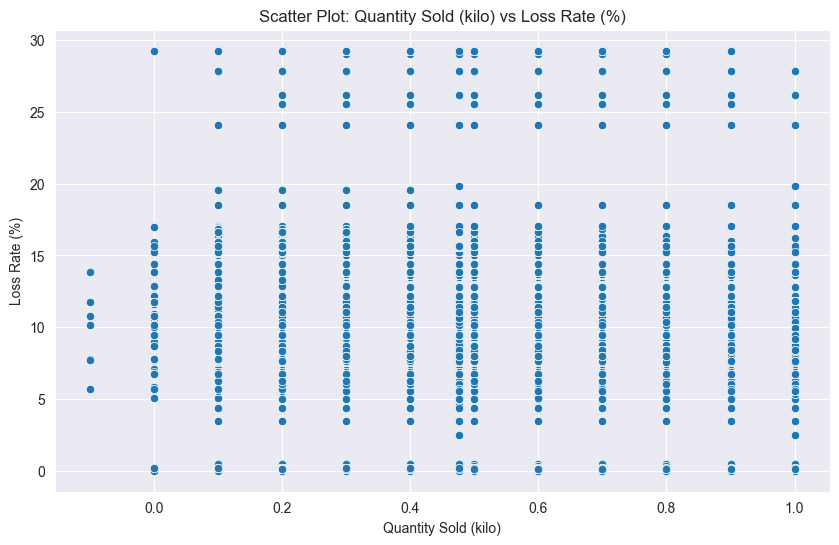

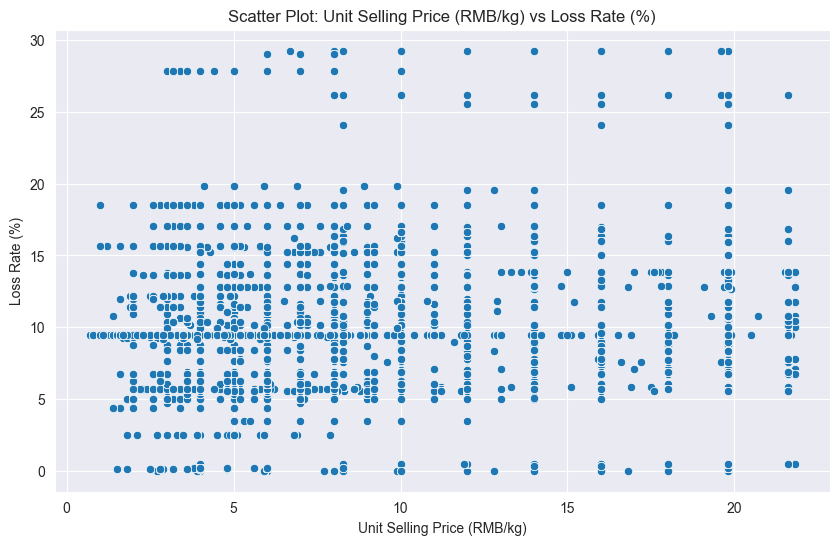

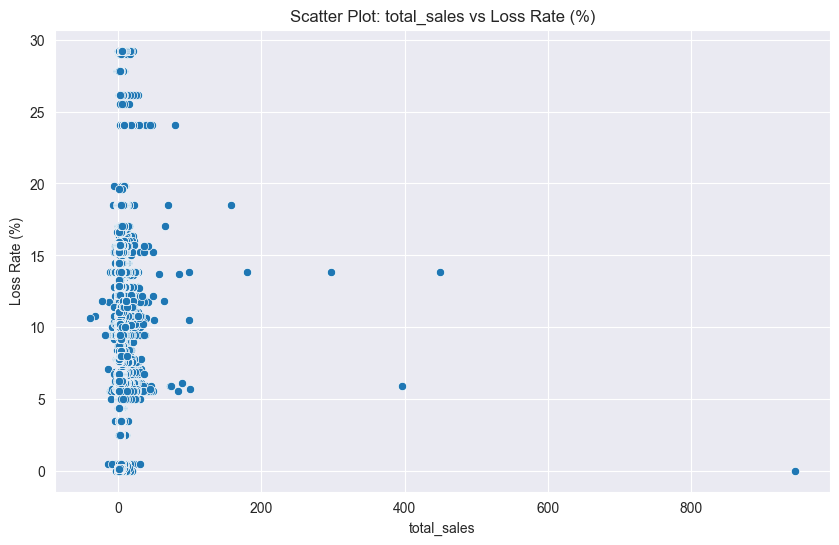

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for 'Quantity Sold (kilo)' vs 'Loss Rate (%)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['Quantity Sold (kilo)'], y=filtered_data['Loss Rate (%)'])
plt.title('Scatter Plot: Quantity Sold (kilo) vs Loss Rate (%)')
plt.xlabel('Quantity Sold (kilo)')
plt.ylabel('Loss Rate s(%)')
plt.show()

# Scatter plot for 'Unit Selling Price (RMB/kg)' vs 'Loss Rate (%)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['Unit Selling Price (RMB/kg)'], y=filtered_data['Loss Rate (%)'])
plt.title('Scatter Plot: Unit Selling Price (RMB/kg) vs Loss Rate (%)')
plt.xlabel('Unit Selling Price (RMB/kg)')
plt.ylabel('Loss Rate (%)')
plt.show()

# Scatter plot for 'total_sales' vs 'Loss Rate (%)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['total_sales'], y=filtered_data['Loss Rate (%)'])
plt.title('Scatter Plot: total_sales vs Loss Rate (%)')
plt.xlabel('total_sales')
plt.ylabel('Loss Rate (%)')
plt.show()


In [54]:
filtered_data.head()

,Month,Category Name,Item Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Wholesale Price (RMB/kg),Loss Rate (%),total_sales,Sale or Return,Discount (Yes/No)
0,1,capsicum,Green Hot Peppers,0.475929,8.287794,5.049097,6.72,28.38,sale,False
1,1,capsicum,Green Hot Peppers,0.600000,8.287794,5.049097,6.72,15.48,sale,False
2,1,capsicum,Green Hot Peppers,0.200000,8.287794,5.049097,6.72,5.16,sale,False
3,1,capsicum,Green Hot Peppers,0.300000,8.287794,5.049097,6.72,7.74,sale,False
4,1,capsicum,Green Hot Peppers,0.300000,8.287794,5.049097,6.72,7.74,sale,False


Save data in a file

In [55]:
# save built dataset
filtered_data.to_csv('../../datasets/cleaned_loss_rate_dataset.csv', index=False)